In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
sns.set()

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import os


from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split

from scipy.stats import boxcox

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)


Bad key "text.kerning_factor" on line 4 in
/Users/valeritereshchenko/opt/anaconda3/envs/ValeriaAllWomen/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
import sys
sys.path.insert(0, '/Users/valeritereshchenko/Documents/AllWomen_May_2020/Notebooks/Students Turn/M4/M4 - Your turn!')
from My_Functions_28_05 import *

Nutrients Handling info - https://wiki.openfoodfacts.org/Nutrients_handling_in_Open_Food_Facts

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
data1 = pd.read_csv("/Users/valeritereshchenko/Desktop/Final Project/en.openfoodfacts.org.products.csv",
                       delimiter='\t',
                       encoding='utf-8')
data1.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,NaN,375.0,1569.0,NaN,7.0,3.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.1,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393980 entries, 0 to 1393979
Columns: 181 entries, code to carnitine_100g
dtypes: float64(122), int64(2), object(57)
memory usage: 1.9+ GB


In [6]:
data1.columns.tolist()

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_en',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'allergens',
 'allergens_en',
 'traces',
 'traces_tags',
 'traces_en',
 'serving_size',
 'serving_quantity',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_en',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_

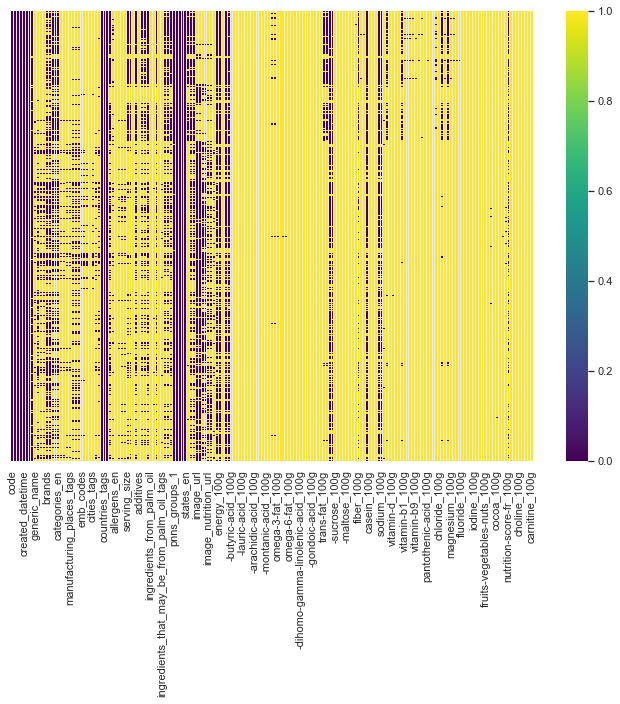

In [7]:
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.heatmap(data1.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.show()

In [8]:
environment = data1[['product_name','carbon-footprint-from-meat-or-fish_100g']].copy().dropna()
environment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10356 entries, 64 to 1390186
Data columns (total 2 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   product_name                             10356 non-null  object 
 1   carbon-footprint-from-meat-or-fish_100g  10356 non-null  float64
dtypes: float64(1), object(1)
memory usage: 242.7+ KB


In [9]:
environment.describe()

,carbon-footprint-from-meat-or-fish_100g
count,10356.000000
mean,628.730265
std,6504.083420
min,0.049000
25%,111.000000
50%,329.360000
75%,614.200000
max,656298.600000


In [10]:
missing = percentage_nullValues(data1)
most_missing = missing[missing['Percentage_NaN'] >= 99.5]
pd.set_option('display.max_rows',500)
most_missing 

,Percentage_NaN
carnitine_100g,100.0
-lactose_100g,100.0
-elaidic-acid_100g,100.0
-gondoic-acid_100g,100.0
-mead-acid_100g,100.0
-erucic-acid_100g,100.0
-nervonic-acid_100g,100.0
-sucrose_100g,100.0
-glucose_100g,100.0
-fructose_100g,100.0


In [11]:
missing = percentage_nullValues(data1)
not_missing = missing[missing['Percentage_NaN'] <= 70]
not_missing 

,Percentage_NaN
serving_size,68.7
serving_quantity,68.7
fiber_100g,68.3
image_nutrition_small_url,61.5
image_nutrition_url,61.5
nova_group,60.9
nutrition-score-fr_100g,59.2
nutriscore_grade,59.2
nutriscore_score,59.2
image_ingredients_url,55.8


In [9]:
not_missing.index

NameError: name 'not_missing' is not defined

In [ ]:
data1['categories'].unique()

In [ ]:
data1['categories_en']

In [ ]:
data1.loc[1,['countries', 'countries_tags', 'countries_en']]
# Looks like these 3 freatures are telling us exactly the same 

In [ ]:
data1.loc[17547,'ingredients_text']

In [ ]:
data1['additives_n'].value_counts() #number of food additives

In [ ]:
data1.loc[15345,'additives_tags']
# we can see that this column contains info about the additives like food dyes, vitamines added etc. 
# example  e129 = red azo food dye 


In [ ]:
data1[data1['allergens'].isnull() == False][['allergens','ingredients_text']][0:10]

In [ ]:
data1['pnns_groups_1'].value_counts()

In [ ]:
data1['pnns_groups_1'].isnull().sum()

In [ ]:
data1['pnns_groups_2'].isnull().sum()

In [ ]:
data1['pnns_groups_2'].value_counts()

In [ ]:
data1['brands'].value_counts()

In [ ]:
data1['brands'].isnull().sum()

In [ ]:
data1['brands_tags'].value_counts()

In [ ]:
data1['brands_tags'].isnull().sum()

In [ ]:
data1['energy_100g'].value_counts()

In [ ]:
data1['energy-kcal_100g'].value_counts(ascending=False)

In [ ]:
data1['image_url'][1453]

In [296]:
from IPython.display import Image
Image(url= "https://static.openfoodfacts.org/images/products/00016063/front_en.5.400.jpg")

In [293]:
data1['image_nutrition_url'][1453]

'https://static.openfoodfacts.org/images/products/00016063/nutrition_en.10.400.jpg'

In [311]:
data1['image_nutrition_url'].isnull().sum()

857041

In [297]:
# At this time, images help to predict nutriscore, using Google Cloud Vision,
Image(url='https://static.openfoodfacts.org/images/products/00016063/nutrition_en.10.400.jpg')

In [112]:
data1['image_small_url'][1]

'https://static.openfoodfacts.org/images/products/000/000/000/0031/front_fr.3.200.jpg'

In [115]:
data1[['categories_en','categories_tags','main_category_en',
            'main_category','categories']].isnull().sum()

categories_en       668527
categories_tags     668527
main_category_en    668527
main_category       668527
categories          668523
dtype: int64

In [117]:
data1[['categories_en','categories_tags','main_category_en',
            'main_category','categories']]

,categories_en,categories_tags,main_category_en,main_category,categories
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,"Groceries,Condiments,Sauces,Mustards","en:groceries,en:condiments,en:sauces,en:mustards",Mustards,en:mustards,"Epicerie, Condiments, Sauces, Moutardes"
4,fr:xsf,fr:xsf,fr:xsf,fr:xsf,Xsf
...,...,...,...,...,...
1393975,"Plant-based foods and beverages,Plant-based fo...","en:plant-based-foods-and-beverages,en:plant-ba...",Marrons glacés,en:marrons-glaces,Marrons glacés
1393976,NaN,NaN,NaN,NaN,NaN
1393977,NaN,NaN,NaN,NaN,NaN
1393978,NaN,NaN,NaN,NaN,NaN


In [118]:
data1['categories_en'].value_counts()

Snacks                                                                                                                                                                                        32838
Groceries,Sauces                                                                                                                                                                              15437
Snacks,Sweet snacks,Confectioneries                                                                                                                                                           14942
Dairies,Fermented foods,Fermented milk products,Cheeses                                                                                                                                       13609
Snacks,Sweet snacks,Biscuits and cakes,Biscuits                                                                                                                                               12635
                    

In [119]:
data1['categories'].value_counts()

Snacks                                                                                  32713
Snacks, Sweet snacks, Confectioneries                                                   14376
Groceries, Sauces                                                                       13910
Dairies, Fermented foods, Fermented milk products, Cheeses                              11349
Snacks, Sweet snacks, Biscuits and cakes, Biscuits                                       9577
                                                                                        ...  
media                                                                                       1
lv:smūtijs                                                                                  1
es:Producto cárnico                                                                         1
Fromages à pâte filée                                                                       1
Dairies, Spreads, Fats, Spreadable fats, Plant-based butters

In [121]:
data1[['nutriscore_score','nutriscore_grade','nutrition-score-fr_100g']].isnull().sum()

nutriscore_score           824916
nutriscore_grade           824916
nutrition-score-fr_100g    824907
dtype: int64

In [122]:
data1['nutrition-score-fr_100g'].value_counts()

 14.0    29474
 0.0     28680
 13.0    25296
 11.0    24876
 2.0     24101
 15.0    23791
 1.0     23193
 12.0    23144
 3.0     23078
 16.0    22140
-1.0     21197
 4.0     20083
 17.0    17170
 5.0     17151
 19.0    15881
-4.0     15612
 18.0    15567
-2.0     15071
 6.0     15011
 10.0    14975
 20.0    14314
-3.0     13491
 9.0     11798
 21.0    11720
 7.0     11475
 8.0     11206
 24.0    10154
 22.0     9657
-5.0      9508
 23.0     9475
 25.0     8689
-6.0      7903
 26.0     7828
 27.0     4906
-7.0      3370
-8.0      2389
 28.0     1738
-9.0      1121
-10.0      798
 29.0      539
 30.0      356
-11.0      294
-12.0      221
 31.0      155
-13.0      144
 32.0       74
-14.0       70
 33.0       57
 34.0       51
 35.0       33
 36.0       21
 37.0       12
 40.0        8
-15.0        5
 39.0        2
Name: nutrition-score-fr_100g, dtype: int64

In [123]:
data1['nutriscore_score'].value_counts()

 14.0    29474
 0.0     28678
 13.0    25296
 11.0    24875
 2.0     24101
 15.0    23791
 1.0     23192
 12.0    23144
 3.0     23077
 16.0    22140
-1.0     21197
 4.0     20083
 17.0    17170
 5.0     17151
 19.0    15881
-4.0     15612
 18.0    15567
-2.0     15071
 6.0     15011
 10.0    14975
 20.0    14314
-3.0     13490
 9.0     11798
 21.0    11720
 7.0     11475
 8.0     11206
 24.0    10154
 22.0     9655
-5.0      9508
 23.0     9475
 25.0     8689
-6.0      7902
 26.0     7828
 27.0     4906
-7.0      3370
-8.0      2389
 28.0     1738
-9.0      1121
-10.0      798
 29.0      539
 30.0      356
-11.0      294
-12.0      221
 31.0      155
-13.0      144
 32.0       74
-14.0       70
 33.0       57
 34.0       51
 35.0       33
 36.0       21
 37.0       12
 40.0        8
-15.0        5
 39.0        2
Name: nutriscore_score, dtype: int64

The **Nutri-Score** is a logo that shows the nutritional quality of food products with A to E grades. With the NutriScore, products can be easily and quickly compared.

The Nutri-Score grade is determined by the amount of healthy and unhealthy nutrients:

Negative points: energy, saturated fat, sugars, sodium (high levels are considered unhealthy)

Positive points: the proportion of fruits, vegetables and nuts, fibers and proteins (high levels are considered good for health).

The detailed Nutri-Score formula is publicly available on the Santé publique France web site.

In [124]:
data1['nutriscore_grade'].value_counts()

d    176186
c    118963
e    108614
a     92194
b     73107
Name: nutriscore_grade, dtype: int64

In [127]:
data1['nova_group'].value_counts()


4.0    364805
3.0    114424
1.0     56614
2.0      9813
Name: nova_group, dtype: int64

#### Classification in 4 groups to highlight the degree of processing of foods
- Group 1 - Unprocessed or minimally processed foods
- Group 2 - Processed culinary ingredients
- Group 3 - Processed foods
- Group 4 - Ultra-processed food and drink products

Studies suggest a correlation between the cosumption of ultra-transformed foods and an increased risk of developing a cancer.

In [11]:
image_df = data1[['code','product_name','image_ingredients_url','image_nutrition_url','image_url','brands_tags','image_ingredients_small_url']]
image_df.to_csv('image_df.csv')

In [12]:
image_df.head(3)

,code,product_name,image_ingredients_url,image_nutrition_url,image_url,brands_tags,image_ingredients_small_url
0,0000000000017,Vitória crackers,https://static.openfoodfacts.org/images/produc...,NaN,https://static.openfoodfacts.org/images/produc...,NaN,https://static.openfoodfacts.org/images/produc...
1,0000000000031,Cacao,NaN,NaN,https://static.openfoodfacts.org/images/produc...,NaN,NaN
2,000000000003327986,Filetes de pollo empanado,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN


In [319]:
df = data1[['code','created_datetime','last_modified_datetime',
           'url','countries_en','pnns_groups_2',
            'product_name','proteins_100g','fat_100g','carbohydrates_100g','nova_group',
           'salt_100g','sodium_100g','sugars_100g','saturated-fat_100g','energy-kcal_100g',
            'brands_tags','categories_en','ingredients_text',
            'ingredients_from_palm_oil_n','additives_n', 
            'nutriscore_grade','categories','nutrition-score-fr_100g']]


In [31]:
df_class = data1[['code','pnns_groups_2',
            'product_name','proteins_100g','fat_100g','carbohydrates_100g','nova_group',
           'salt_100g','sodium_100g','sugars_100g','saturated-fat_100g','energy-kcal_100g',
            'ingredients_from_palm_oil_n','additives_n', 
            'nutriscore_grade','nutrition-score-fr_100g','fiber_100g']]

df_class.to_csv('df_for_class.csv')

In [320]:
df.head(3)

,code,created_datetime,last_modified_datetime,url,countries_en,pnns_groups_2,product_name,proteins_100g,fat_100g,carbohydrates_100g,nova_group,salt_100g,sodium_100g,sugars_100g,saturated-fat_100g,energy-kcal_100g,brands_tags,categories_en,ingredients_text,ingredients_from_palm_oil_n,additives_n,nutriscore_grade,categories,nutrition-score-fr_100g
0,0000000000017,2018-06-15T10:38:00Z,2019-06-25T11:55:18Z,http://world-en.openfoodfacts.org/product/0000...,France,unknown,Vitória crackers,7.8,7.0,70.1,NaN,1.4,0.56,15.0,3.08,375.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,2018-10-13T21:06:14Z,2018-10-13T21:06:57Z,http://world-en.openfoodfacts.org/product/0000...,France,unknown,Cacao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000000000003327986,2019-11-19T15:02:16Z,2019-11-19T15:02:17Z,http://world-en.openfoodfacts.org/product/0000...,Spain,unknown,Filetes de pollo empanado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [322]:
print("Data shape before 1st cleaning ", data1.shape)
print("Data shape after 1st cleaning ", df.shape)
print( "We dropped ",data1.shape[1]- df.shape[1], "columns")


Data shape before 1st cleaning  (1393980, 181)
Data shape after 1st cleaning  (1393980, 24)
We dropped  157 columns


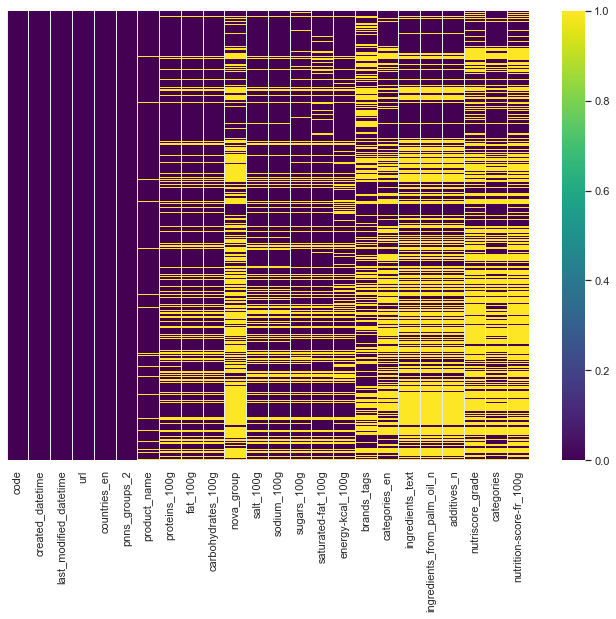

In [323]:
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.show()

In [324]:
df_clean = df.dropna()
df_clean.shape

(250407, 24)

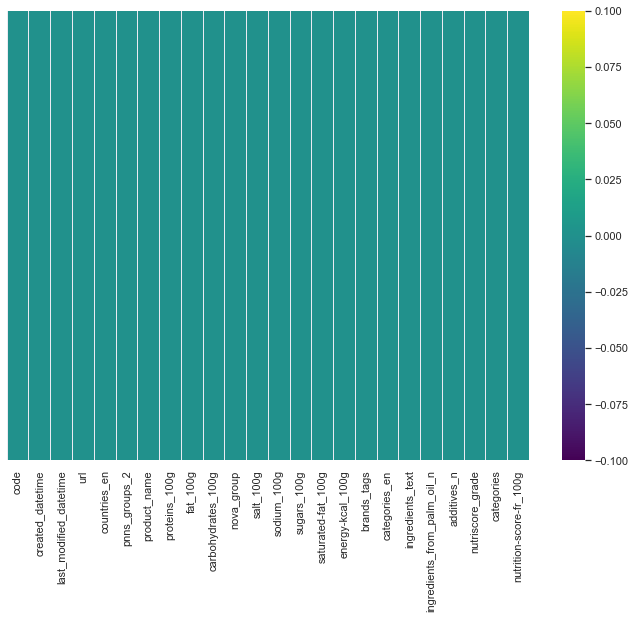

In [325]:
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.heatmap(df_clean.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.show()

In [326]:
df_clean.describe()

,proteins_100g,fat_100g,carbohydrates_100g,nova_group,salt_100g,sodium_100g,sugars_100g,saturated-fat_100g,energy-kcal_100g,ingredients_from_palm_oil_n,additives_n,nutrition-score-fr_100g
count,250407.000000,250407.000000,250407.000000,250407.000000,250407.000000,250407.000000,250407.000000,250407.000000,250407.000000,250407.000000,250407.000000,250407.000000
mean,7.773772,13.831079,30.889336,3.405811,1.391929,0.556751,14.605317,5.158229,280.180769,0.023230,2.129873,9.344515
std,9.596638,16.572704,27.901380,0.945696,38.545469,15.415963,19.218594,8.455200,186.524031,0.152609,2.868753,8.941567
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,1.750000,1.000000,5.900000,3.000000,0.100000,0.040000,1.200000,0.000000,110.000000,0.000000,0.000000,2.000000
50%,5.700000,7.800000,20.600000,4.000000,0.625000,0.250000,5.000000,1.900000,272.000000,0.000000,1.000000,10.000000
75%,10.710000,22.000000,55.810000,4.000000,1.302500,0.521000,22.800000,7.300000,412.000000,0.000000,3.000000,16.000000
max,2000.000000,670.000000,1418.000000,4.000000,16815.000000,6726.000000,545.000000,1780.000000,5466.000000,2.000000,38.000000,40.000000


In [327]:
print('Data duplicated values', df.duplicated().sum())
print ("Size of data: {}".format(df.shape))

Data duplicated values 62
Size of data: (1393980, 24)


In [328]:
df = df.drop_duplicates()
print ("Size of data: {}".format(df.shape))

Size of data: (1393918, 24)


In [329]:
print('Data duplicated values', df_clean.duplicated().sum())
print ("Size of data: {}".format(df_clean.shape))

Data duplicated values 0
Size of data: (250407, 24)


In [330]:
help(get_info_datasetPrint)

Help on function get_info_datasetPrint in module My_Functions_28_05:

get_info_datasetPrint(data, bool_index, print_index)
    This function will be used to extract info from the dataset
    input: dataframe containing all variables
            bool_index: Boolean index. if it's True that means that you want to proint two list that
            will contain the col names of the categorical and numerical variables, respectively
            print_index : True / False . If True == will show the results on the python screen



In [331]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250407 entries, 64 to 1393933
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   code                         250407 non-null  object 
 1   created_datetime             250407 non-null  object 
 2   last_modified_datetime       250407 non-null  object 
 3   url                          250407 non-null  object 
 4   countries_en                 250407 non-null  object 
 5   pnns_groups_2                250407 non-null  object 
 6   product_name                 250407 non-null  object 
 7   proteins_100g                250407 non-null  float64
 8   fat_100g                     250407 non-null  float64
 9   carbohydrates_100g           250407 non-null  float64
 10  nova_group                   250407 non-null  float64
 11  salt_100g                    250407 non-null  float64
 12  sodium_100g                  250407 non-null  float64
 1

In [333]:
df_clean.to_csv('clean_df_23.csv')

In [242]:
df_clean.iloc[3570,0]

# that's why pd.to_numeric does not work (number too large)

'010026527000000039040070000'

In [205]:
vit_min = data1[['code','product_name','fiber_100g','serving_quantity','serving_size', 
           'additives_tags','cholesterol_100g','trans-fat_100g',
           'calcium_100g','vitamin-c_100g','iron_100g','vitamin-a_100g']].copy()
vit_min = vit_min.dropna()
vit_min.to_csv('vitamins & minerals.csv')
vit_min.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127077 entries, 195 to 1392209
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   code              127077 non-null  object 
 1   product_name      127077 non-null  object 
 2   fiber_100g        127077 non-null  float64
 3   serving_quantity  127077 non-null  float64
 4   serving_size      127077 non-null  object 
 5   additives_tags    127077 non-null  object 
 6   cholesterol_100g  127077 non-null  float64
 7   trans-fat_100g    127077 non-null  float64
 8   calcium_100g      127077 non-null  float64
 9   vitamin-c_100g    127077 non-null  float64
 10  iron_100g         127077 non-null  float64
 11  vitamin-a_100g    127077 non-null  float64
dtypes: float64(8), object(4)
memory usage: 12.6+ MB


In [243]:
get_info_datasetPrint(df_clean, True, True)

Numerical variables are:
 Index(['proteins_100g', 'fat_100g', 'carbohydrates_100g', 'nova_group',
       'salt_100g', 'sodium_100g', 'sugars_100g', 'saturated-fat_100g',
       'energy-kcal_100g', 'ingredients_from_palm_oil_n', 'additives_n'],
      dtype='object')
-------------------------------------------------
Categorical variables are:
 Index(['code', 'created_datetime', 'last_modified_datetime', 'url',
       'countries_en', 'pnns_groups_2', 'product_name', 'image_url',
       'brands_tags', 'categories_en', 'ingredients_text',
       'image_ingredients_url', 'nutriscore_grade', 'image_nutrition_url'],
      dtype='object')
-------------------------------------------------


(Index(['proteins_100g', 'fat_100g', 'carbohydrates_100g', 'nova_group',
        'salt_100g', 'sodium_100g', 'sugars_100g', 'saturated-fat_100g',
        'energy-kcal_100g', 'ingredients_from_palm_oil_n', 'additives_n'],
       dtype='object'),
 Index(['code', 'created_datetime', 'last_modified_datetime', 'url',
        'countries_en', 'pnns_groups_2', 'product_name', 'image_url',
        'brands_tags', 'categories_en', 'ingredients_text',
        'image_ingredients_url', 'nutriscore_grade', 'image_nutrition_url'],
       dtype='object'))

In [316]:
countries = df['countries_en'].value_counts().head(25).to_frame()
s = countries.style.background_gradient(cmap='Blues')
s

,countries_en
France,622422
United States,322932
Spain,151426
Belgium,36321
Germany,35508
Switzerland,34620
United Kingdom,20614
Canada,11178
"France,Spain",10516
"France,Germany",10093


In [317]:
#There is something strange going on with countries, let's try to detect all the combinations 
# --> when 2 countries are listed, it means that the product is sold in both of them 

In [196]:
df['countries_en'].unique()

array(['France', 'Spain', 'United States', ...,
       'Spain,Argentina-espanol,Armenia-pyсский,Aruba-espanol,Asia-pacific,Australia-english,Austria-deutsch,Azerbaijan-русский,Belarus-pyсский,Belgium-francais,Belgium-nederlands,Bolivia-espanol,Bosnia-i-hercegovina-bosnian,Botswana-english,Brazil-portugues,Bulgaria-български,Cambodia-english,Cambodia-ភាសាខ្មែរ,Canada-english,Canada-francais,Chile-espanol,China-中文,Colombia-espanol,Costa-rica-espanol,Croatia-hrvatski,Cyprus-ελληνικά,Czech-republic-čeština,Denmark-dansk,Ecuador-espanol,El-salvador-espanol,Estonia-eesti,Europe,Finland-suomi,France-francais,Georgia-ქართული,Germany-deutsch,Ghana-english,Greece-ελληνικά,Guatemala-espanol,Honduras-espanol,Hong-kong-粵語,Hungary-magyar,Iceland-islenska,India-english,Indonesia-bahasa-indonesia,Ireland-english,Israel-עברית,Italy-italiano,Jamaica-english,Japan-日本語,Kazakhstan-pyсский,Korea-한국어,Kyrgyzstan-русский,Latvia-latviešu,Lebanon-english,Lesotho-english,Lithuania-lietuvių,Macau-中文,Malaysia-bahas

In [197]:
data1['countries'].unique()

array(['France', 'en:es', 'en:France', ...,
       'Spain,Argentina - Español,Aruba - Español,Bolivia - Español,Brazil - Português,Canada - English,Canada - Français,Chile - Español,Colombia - Español,Costa Rica - Español,Ecuador - Español,El Salvador - Español,Guatemala - Español,Honduras - Español,Jamaica - English,Mexico - Español,Nicaragua - Español,Panamá - Español,Paraguay - Español,Perú - Español,Puerto Rico - Español,República Dominicana - Español,Trinidad & Tobago - English,United States - English,United States - Español,Uruguay - Español,Venezuela - Español,Europe,Armenia - Pyсский,Austria - Deutsch,Azerbaijan - Русский,Belarus - Pyсский,Belgium - Français,Belgium - Nederlands,Bosnia i Hercegovina - Bosnian,Bulgaria - български,Croatia - Hrvatski,Cyprus - Ελληνικά,Czech Republic - Čeština,Denmark - Dansk,Estonia - Eesti,Finland - Suomi,France - Français,Georgia - ქართული,Germany - Deutsch,Greece - Ελληνικά,Hungary - Magyar,Iceland - Íslenska,Ireland - English,Italy - Italiano

In [186]:
france = df[df['countries_en']=='France']
france.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 622402 entries, 0 to 1393979
Data columns (total 38 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   code                                     622402 non-null  object 
 1   creator                                  622401 non-null  object 
 2   created_datetime                         622402 non-null  object 
 3   last_modified_datetime                   622402 non-null  object 
 4   url                                      622402 non-null  object 
 5   countries_en                             622402 non-null  object 
 6   pnns_groups_2                            622240 non-null  object 
 7   product_name                             604666 non-null  object 
 8   proteins_100g                            490815 non-null  float64
 9   fat_100g                                 488858 non-null  float64
 10  carbohydrates_100g             

USA, France and Spain are the countries with most products in this dataset, the next thing to do is check the brands represented in this dataset

In [315]:
brands= df['brands_tags'].value_counts().head(25).to_frame()
k = brands.style.background_gradient(cmap='Reds')
k

,brands_tags
carrefour,13403
auchan,10833
u,6076
nestle,5206
bonarea,4832
delhaize,4570
hacendado,4566
leader-price,4411
casino,4401
coop,3408


In [178]:
spain = df[df['countries_en']=='Spain']

In [164]:
missing_spain = percentage_nullValues(spain)
most_missing_spain = missing_spain[missing_spain['Percentage_NaN'] >= 50]
pd.set_option('display.max_rows',500)
most_missing_spain

,Percentage_NaN
trans-fat_100g,100.0
vitamin-a_100g,99.9
iron_100g,99.9
vitamin-c_100g,99.9
cholesterol_100g,99.9
calcium_100g,99.7
serving_size,97.9
serving_quantity,97.9
additives_tags,95.9
fiber_100g,95.5


In [165]:
most_missing_spain.index

Index(['trans-fat_100g', 'vitamin-a_100g', 'iron_100g', 'vitamin-c_100g',
       'cholesterol_100g', 'calcium_100g', 'serving_size', 'serving_quantity',
       'additives_tags', 'fiber_100g', 'nova_group', 'ingredients_text',
       'additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'image_ingredients_url',
       'nutrition-score-fr_100g', 'nutriscore_grade', 'categories_en',
       'brands_tags'],
      dtype='object')

In [179]:
spain = spain.drop(['trans-fat_100g', 'vitamin-a_100g', 'iron_100g', 'vitamin-c_100g',
       'cholesterol_100g', 'calcium_100g', 'serving_size', 'serving_quantity',
       'additives_tags', 'fiber_100g', 'nova_group', 'ingredients_text',
       'additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n','image_ingredients_url'], axis=1)
spain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151419 entries, 2 to 1393916
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   code                     151419 non-null  object 
 1   creator                  151419 non-null  object 
 2   created_datetime         151419 non-null  object 
 3   last_modified_datetime   151419 non-null  object 
 4   url                      151419 non-null  object 
 5   countries_en             151419 non-null  object 
 6   pnns_groups_2            151405 non-null  object 
 7   product_name             139787 non-null  object 
 8   proteins_100g            113135 non-null  float64
 9   fat_100g                 113122 non-null  float64
 10  carbohydrates_100g       113124 non-null  float64
 11  salt_100g                115180 non-null  float64
 12  sodium_100g              115180 non-null  float64
 13  sugars_100g              112772 non-null  float64
 14  sat

Let's also drop the 'nutriscore_grade', 'nutrition-score-fr_100g' & 'nutrition-score-fr_100g'

We will try to count the nutriscore using the formula or searching for similar French products  


In [184]:
no_nutriscore = spain[spain['nutrition-score-fr_100g']==0]
no_nutriscore.url[19189]

'http://world-en.openfoodfacts.org/product/0013932004541/couscous'

In [185]:
no_nutriscore

,code,creator,created_datetime,last_modified_datetime,url,countries_en,pnns_groups_2,product_name,proteins_100g,fat_100g,carbohydrates_100g,salt_100g,sodium_100g,sugars_100g,saturated-fat_100g,energy-kcal_100g,image_url,brands_tags,categories_en,nutriscore_grade,nutrition-score-fr_100g,image_nutrition_url
19189,13932004541,kiliweb,2019-10-06T08:12:11Z,2019-10-26T10:24:21Z,http://world-en.openfoodfacts.org/product/0013...,Spain,Cereals,Couscous,13.0,1.9,70.0,0.0200,0.00800,6.0,0.3,355.0,https://static.openfoodfacts.org/images/produc...,NaN,"Plant-based foods and beverages,Plant-based fo...",b,0.0,https://static.openfoodfacts.org/images/produc...
60375,329231200619003403,kiliweb,2019-11-14T20:28:07Z,2019-11-14T22:47:12Z,http://world-en.openfoodfacts.org/product/0032...,Spain,Meat,Pechuga entera,23.0,21.0,0.0,0.2000,0.08000,0.0,0.6,469.0,https://static.openfoodfacts.org/images/produc...,bonarea,"Meats,Poultries,Chickens",b,0.0,https://static.openfoodfacts.org/images/produc...
107812,41570112717,javichu,2016-01-24T22:52:27Z,2019-11-28T13:32:45Z,http://world-en.openfoodfacts.org/product/0041...,Spain,Plant-based milk substitutes,Bebida de almendras original,0.5,1.1,2.9,0.1000,0.04000,2.8,0.0,24.0,https://static.openfoodfacts.org/images/produc...,almond-breeze,"Plant-based foods and beverages,Beverages,Plan...",b,0.0,https://static.openfoodfacts.org/images/produc...
107813,41570112731,javichu,2016-01-24T23:09:56Z,2020-05-16T06:49:21Z,http://world-en.openfoodfacts.org/product/0041...,Spain,Plant-based milk substitutes,Almond breve zero,0.5,1.1,0.2,0.1500,0.06000,0.0,0.1,13.0,https://static.openfoodfacts.org/images/produc...,almond-breeze,"Plant-based foods and beverages,Beverages,Plan...",b,0.0,https://static.openfoodfacts.org/images/produc...
133714,00531306400820004415,kiliweb,2020-03-05T14:43:43Z,2020-05-24T21:16:55Z,http://world-en.openfoodfacts.org/product/0053...,Spain,Meat,Contramuslos amarillos,18.0,10.0,0.0,0.0000,0.00000,0.0,3.1,162.0,https://static.openfoodfacts.org/images/produc...,bonarea,"Meats,Poultries,Chickens",b,0.0,https://static.openfoodfacts.org/images/produc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380618,9020200013120,javichu,2012-08-24T12:34:12Z,2020-03-21T19:32:47Z,http://world-en.openfoodfacts.org/product/9020...,Spain,Plant-based milk substitutes,Bebida de arroz ecológica &quot;Joya&quot;,0.4,0.8,10.2,0.1016,0.04064,3.0,0.2,NaN,https://static.openfoodfacts.org/images/produc...,joya,"Plant-based foods and beverages,Beverages,Plan...",b,0.0,https://static.openfoodfacts.org/images/produc...
1380647,9020200019429,elcoco,2019-06-27T12:38:37Z,2020-05-07T07:14:27Z,http://world-en.openfoodfacts.org/product/9020...,Spain,Plant-based milk substitutes,Bebida de avena,0.7,0.8,7.7,0.1000,0.04000,4.5,0.1,42.0,https://static.openfoodfacts.org/images/produc...,joya,"Plant-based foods and beverages,Beverages,Plan...",b,0.0,https://static.openfoodfacts.org/images/produc...
1380913,90377785,fp111,2014-09-03T14:47:46Z,2020-02-04T14:31:49Z,http://world-en.openfoodfacts.org/product/9037...,Spain,Waters and flavored waters,Agua mineral natural,0.0,0.0,0.0,0.0000,0.00000,0.0,0.0,0.0,https://static.openfoodfacts.org/images/produc...,aquabona,"Beverages,Waters,Spring waters,Mineral waters,...",a,0.0,https://static.openfoodfacts.org/images/produc...
1389438,9408172800533,gorgorito,2016-07-16T23:10:05Z,2020-05-08T15:16:45Z,http://world-en.openfoodfacts.org/product/9408...,Spain,Plant-based milk substitutes,Bebida de avena calcium,0.7,1.5,7.0,0.1000,0.04000,3.5,0.2,NaN,https://static.openfoodfacts.org/images/produc...,naturgreen,"Plant-based foods and beverages,Beverages,Plan...",b,0.0,https://static.openfoodfacts.org/images/produc...


In [171]:
brands= spain['brands_tags'].value_counts().head(10).to_frame()
k1 = brands.style.background_gradient(cmap='Reds')
k1

,brands_tags
bonarea,4734
hacendado,4483
carrefour,2728
eroski,1842
entrepinares,1450
auchan,1434
alteza,1209
consum,1172
eliges,909
bonpreu,890


In [47]:
g = df.groupby('code')


### Variables of interest

In [52]:
nutrition_table = df[["energy_100g",
                        "fat_100g",
                        "carbohydrates_100g",
                        "sugars_100g",
                        "proteins_100g",
                        "salt_100g"]]

In [ ]:
nutrition_table_test = df[["code","energy_100g",
                        "fat_100g",
                        "carbohydrates_100g",
                        "sugars_100g",
                        "proteins_100g",
                        "salt_100g",'saturated-fat_100g']]

In [54]:
nutrition_table

,energy_100g,fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g
0,1569.0,7.0,70.1,15.0,7.8,1.40
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,936.0,8.2,29.0,22.0,5.1,4.60
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1393975,NaN,NaN,NaN,NaN,NaN,NaN
1393976,418.0,12.0,2.0,1.0,1.0,1.00
1393977,NaN,NaN,NaN,NaN,NaN,NaN
1393978,100.0,0.3,2.4,0.6,1.6,0.64


In [55]:
nutrition_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393938 entries, 0 to 1393979
Data columns (total 6 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   energy_100g         1125746 non-null  float64
 1   fat_100g            1117802 non-null  float64
 2   carbohydrates_100g  1117247 non-null  float64
 3   sugars_100g         1096525 non-null  float64
 4   proteins_100g       1119132 non-null  float64
 5   salt_100g           1100791 non-null  float64
dtypes: float64(6)
memory usage: 74.4 MB


In [56]:
missing2 = percentage_nullValues(nutrition_table)
missing2 

,Percentage_NaN
sugars_100g,21.3
salt_100g,21.0
fat_100g,19.8
carbohydrates_100g,19.8
proteins_100g,19.7
energy_100g,19.2


In [57]:
nutrition_table.dropna(axis = 0, how = "any", inplace=True)
nutrition_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1062132 entries, 0 to 1393978
Data columns (total 6 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   energy_100g         1062132 non-null  float64
 1   fat_100g            1062132 non-null  float64
 2   carbohydrates_100g  1062132 non-null  float64
 3   sugars_100g         1062132 non-null  float64
 4   proteins_100g       1062132 non-null  float64
 5   salt_100g           1062132 non-null  float64
dtypes: float64(6)
memory usage: 56.7 MB


### Feature engineering 
Before we start our analysis we have to make some more adjustments to our dataset. First of all we want to add some more features that could be helpful for clustering our data.

Therefore we add the feature **g_sum** which represents the rounded sum of the fat-, carbohydrates-, proteins- and salt-values in our data. By doing that we can easily see if there are some products with false entries.

Furthermore we add the feature **other_carbs** which includes the value of all carbs that are not sugars. Because of that our model can see the correlation between carbohydrates and sugars.

The last feature we want to add is **reconstructed_engery**. It calculates the energy value of a product based on energy values of the features fat, carbohydrates and proteins. We can compare this feature to the amount of energy that is given in our dataset to see if there possibly are some wrong entries.

In [58]:
nutrition_table["g_sum"] = nutrition_table.fat_100g + nutrition_table.carbohydrates_100g + nutrition_table.proteins_100g + nutrition_table.salt_100g
nutrition_table["g_sum"] = round(nutrition_table.g_sum)
nutrition_table["other_carbs"] = nutrition_table.carbohydrates_100g - nutrition_table.sugars_100g

nutrition_table["reconstructed_energy"] = nutrition_table.fat_100g * 37 + (nutrition_table.proteins_100g + nutrition_table.carbohydrates_100g)* 17

In [59]:
nutrition_table.columns

Index(['energy_100g', 'fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'proteins_100g', 'salt_100g', 'g_sum', 'other_carbs',
       'reconstructed_energy'],
      dtype='object')

In [187]:
nutrition_table.to_csv('nutrition_table.csv')